          x       y
184  4.5674  0.0815
119  5.4498  0.4595
154  0.0178  1.5672
160  8.3064 -1.9321


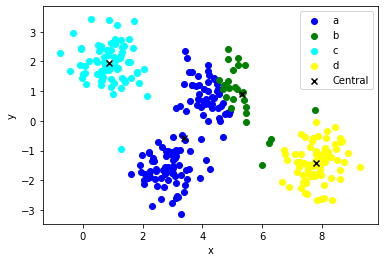

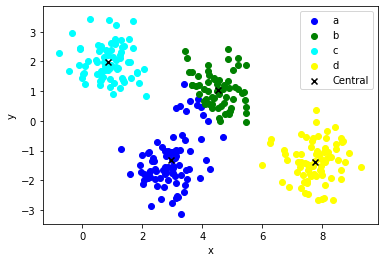

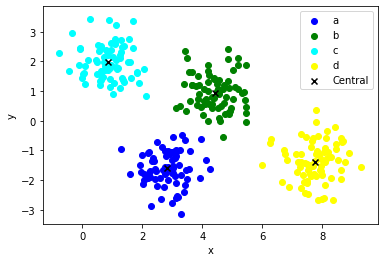

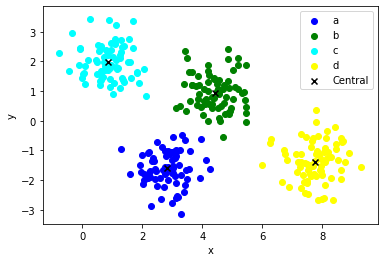

In [6]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("D:/程設/cdata.csv")
DT = data[["x","y"]]
K=4
Centroids = (DT.sample(n=K))
print(Centroids)
diff = 1
j=0
while(diff!=0):
    XD=DT
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["x"]-row_d["x"])**2
            d2=(row_c["y"]-row_d["y"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        DT[i]=ED
        i=i+1

    C=[]
    for index,row in DT.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    DT["Cluster"]=C
    Centroids_new = DT.groupby(["Cluster"]).mean()[["x","y"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new["x"] - Centroids["x"]).sum() + (Centroids_new["y"] - Centroids["y"]).sum()
    Centroids = DT.groupby(["Cluster"]).mean()[["x","y"]]
    
    color=["blue","green","cyan","yellow"]
    label=["a","b","c","d","Central"]
    for k in range(K):
        data=DT[DT["Cluster"]==k+1]
        plt.scatter(data["x"],data["y"],c=color[k],label=label[k])
    plt.scatter(Centroids["x"],Centroids["y"],marker="x",c='black')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(labels=label,loc="upper right")
    plt.show()

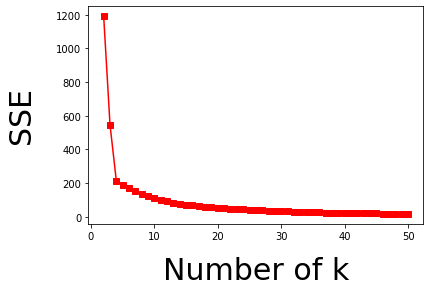

In [22]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline 
data=pd.read_csv("D:/程設/cdata.csv")
DT = data[["x","y"]]
x1=[]
y1=[]
for i in range(2,51):
    x1.append(i)
    n=KMeans(n_clusters=i).fit(DT)
    y_1=0
    ct=n.cluster_centers_
    clulbl=n.labels_
    for j in range(len(DT)):
        n=clulbl[j]
        xycen=ct[n]
        y_1=y_1+(DT.iloc[j,0]-xycen[0])**2+(DT.iloc[j,1]-xycen[1])**2
    y1.append(y_1)
import math
plt.plot(x1,y1,"s-",color="r")
plt.xlabel("Number of k",fontsize=30,labelpad=15)
plt.ylabel("SSE",fontsize=30,labelpad=20)
plt.show()

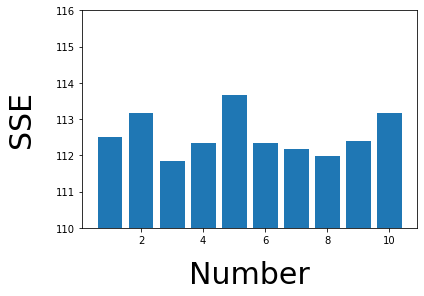

In [17]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline 
data=pd.read_csv("D:/程設/cdata.csv")
DT = data[["x","y"]]
x1=[]
y1=[]
for i in range(10):
    x1.append(i+1)
    n=KMeans(n_clusters=10).fit(DT)
    y_1=0
    ct=n.cluster_centers_
    clulbl=n.labels_
    for j in range(len(DT)):
        n=clulbl[j]
        xycen=ct[n]
        y_1=y_1+(DT.iloc[j,0]-xycen[0])**2+(DT.iloc[j,1]-xycen[1])**2
    y1.append(y_1)
plt.bar(x1,y1)
plt.ylim(110,116)
plt.xlabel("Number",fontsize=30,labelpad=15)
plt.ylabel("SSE",fontsize=30,labelpad=20)
plt.show()